In [184]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

import matplotlib.pyplot as plt
from BasicSetupUtilities.MetaDataBuilder import CountryMetaDataFile
from DataIOUtilities.DataLib import DataLib, DatastreamPulls
import pandas as pd
import numpy as np
import sklearn.preprocessing

In [2]:
WEEKDAYS_IN_YEAR = 261
DAYS_IN_MONTH = 20

dl = DataLib("SignalData")
BondReturnIdx = dl.pull("BondRetIdx/LocalFX")
fxvsusd = dl.pull("fxVsUSD")
equities = dl.pull("EquityPrices")
m1 = dl.pull("M1/inUSD")
m2 = dl.pull("M2/inUSD")
m3 = dl.pull("M3/inUSD")
curr_acct_nom = dl.pull("CurrAcctNom/inUSD")
curr_acct_gdp = dl.pull("CurrAcctPctGDP")
LongRates = dl.pull("LongRates")
ShortRates = dl.pull("ShortRates")
fxNominal = dl.pull("fxTrdWts/Nominal")
fxReal = dl.pull("fxTrdWts/Real")
core_cpi = dl.pull("CoreCPI/SA")
gdp_real = dl.pull("GDP/Real")

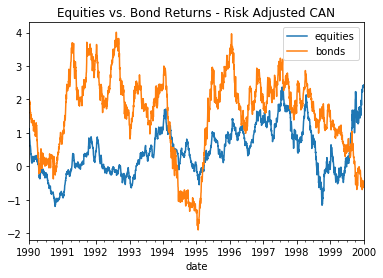

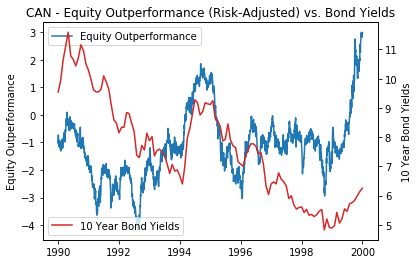

In [18]:
equity_ret = equities.pct_change(WEEKDAYS_IN_YEAR)
equity_risk_adjusted = equity_ret / equity_ret.std()
bond_ret = BondReturnIdx.pct_change(WEEKDAYS_IN_YEAR)
bond_risk_adjusted = bond_ret / bond_ret.std()

country = "CAN"
start_date = '1990-01-01'
end_date = '2000-01-01'
equity_risk_adjusted[country].loc[start_date:end_date].plot(label = "equities")
bond_risk_adjusted[country].loc[start_date:end_date].plot(label = "bonds")
plt.legend()
plt.title("Equities vs. Bond Returns - Risk Adjusted " + country)
plt.show()

equity_risk_adjusted_outperformance = (equity_risk_adjusted - bond_risk_adjusted)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1_label = 'Equity Outperformance'
ax1.plot(equity_risk_adjusted_outperformance[country].loc[start_date:end_date].to_timestamp(), label = ax1_label)
ax1.set_ylabel(ax1_label)
ax1.legend()
ax2_label = '10 Year Bond Yields'
ax2.plot(LongRates[country].loc[start_date:end_date].to_timestamp(), color = 'tab:red', label = ax2_label)
ax2.set_ylabel(ax2_label)
ax2.legend(loc = "lower left")
plt.title(country + " - Equity Outperformance (Risk-Adjusted) vs. Bond Yields")
plt.show()

In [103]:
def calc_corr(m_period_data, b_period_data):
    interpolated_data = m_period_data.resample('B').interpolate(method='linear')
    return interpolated_data.corr(d_period_data)

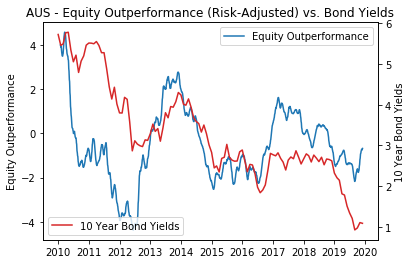

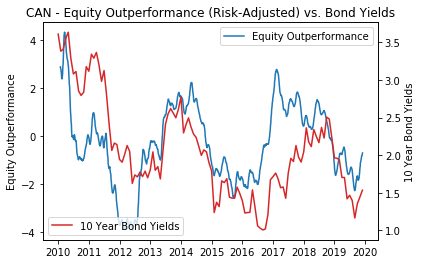

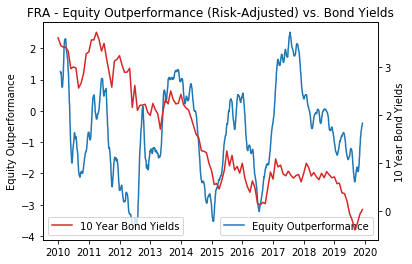

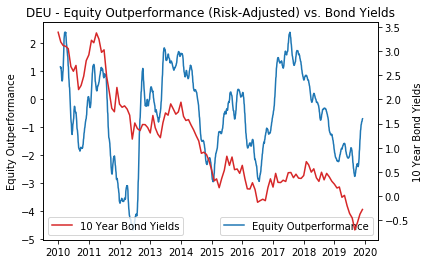

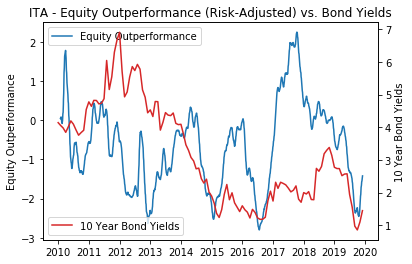

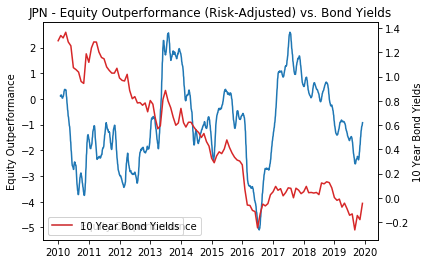

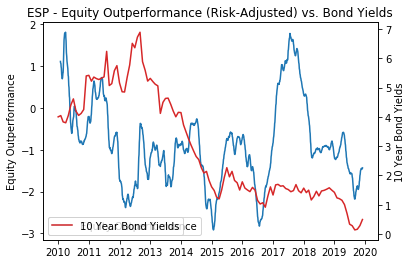

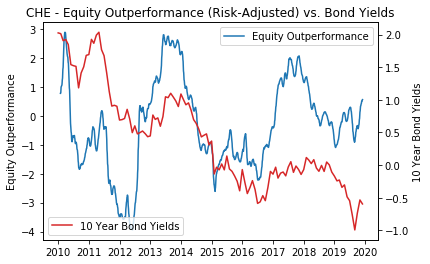

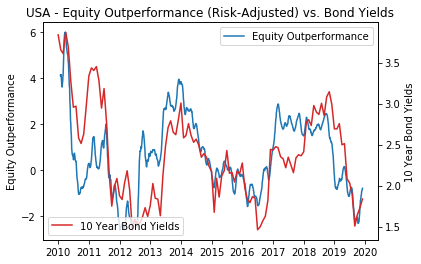

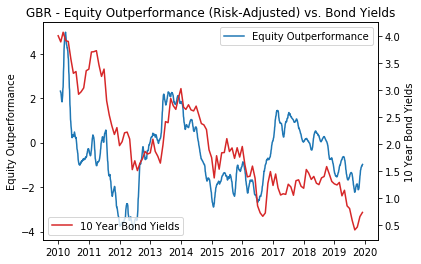

In [366]:
start_date = "2010-01-01"
end_date = "2019-12-01"
training_eq = equity_ret.loc[start_date:end_date]
training_bond = bond_ret.loc[start_date:end_date]
equities_risk_adj = training_eq/training_eq.std()
bond_risk_adj = training_bond/training_bond.std()
outperformance = equities_risk_adj - bond_risk_adj
outperformance = outperformance.rolling(20).mean()


one_day_returns = BondReturnIdx.pct_change(1)
for country in equities.columns:
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1_label = 'Equity Outperformance'
    ax1.plot(outperformance[country].loc[start_date:end_date].to_timestamp(), label = ax1_label)
    ax1.set_ylabel(ax1_label)
    ax1.legend()
    ax2_label = '10 Year Bond Yields'
    ax2.plot(LongRates[country].loc[start_date:end_date].to_timestamp(), color = 'tab:red', label = ax2_label)
    ax2.set_ylabel(ax2_label)
    ax2.legend(loc = "lower left")
    plt.title(country + " - Equity Outperformance (Risk-Adjusted) vs. Bond Yields")
    plt.show()
#     print("Corr between Equity Outperformance and Bond Yields " + country)
#     print(calc_corr(LongRates[country].loc[start_date:end_date],outperformance[country].loc[start_date:end_date]))
    
#     fig, ax1 = plt.subplots()
#     ax2 = ax1.twinx()
#     ax1_label = 'Equity Outperformance'
#     ax1.plot(outperformance[country].loc[start_date:end_date].to_timestamp(), label = ax1_label)
#     ax1.set_ylabel(ax1_label)
#     ax1.legend()
#     ax2_label = 'Bond Returns'
#     ax2.plot(one_day_returns[country].loc[start_date:end_date].to_timestamp(), color = 'tab:red', label = ax2_label)
#     ax2.set_ylabel(ax2_label)
#     ax2.legend(loc = "lower left")
#     plt.title(country + " - Equity Outperformance (Risk-Adjusted) vs. Bond Returns")
#     plt.show()

**Takeaways**:
- When country-specific equity out-performance exceeds that of global equity outperformance, the country is far more likely to experience bond yields rise. Weighting across countries will be standardized around global avg.
- Percentage change in Equity Outperformance 

country
AUS   -1.310493
CAN   -0.750831
CHE   -1.145452
DEU   -2.279655
ESP   -2.265336
FRA   -3.163052
GBR   -0.776963
ITA   -1.773568
JPN   -0.981439
USA   -1.065584
Name: 2015-06-10, dtype: float64
country
AUS   -0.007364
CAN    0.000933
CHE    0.005468
DEU    0.018501
ESP    0.018336
FRA    0.028652
GBR   -0.001234
ITA    0.012685
JPN   -0.003583
USA    0.004550
Name: 2015-06-10, dtype: float64


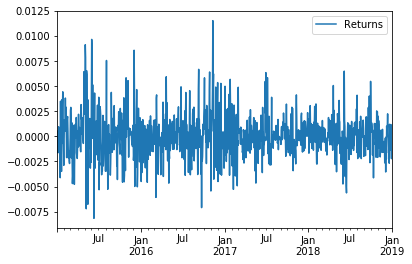

In [142]:
start_date = '1990-01-01'
end_date = '2015-01-01'
trade_date = '2015-01-02'
unwind_date = '2019-01-01'
trade_range = pd.date_range(trade_date, unwind_date, freq='B')
daily_pl = pd.DataFrame(index = trade_range.to_period("B"), columns = ["Daily P&L"])

equity_ret = equities.pct_change(WEEKDAYS_IN_YEAR)
bond_ret = BondReturnIdx.pct_change(WEEKDAYS_IN_YEAR)
one_day_returns = BondReturnIdx.pct_change(1)
daily_ret = pd.DataFrame(index = trade_range.to_period("B"), columns = ["Returns"])

#positions_track = pd.DataFrame(index = trade_range.to_period("B"), columns = equity_ret.columns)

for date in pd.date_range(trade_date, unwind_date, freq='B').date:
    training_eq = equity_ret.loc[start_date:end_date]
    training_bond = bond_ret.loc[start_date:end_date]
    equities_risk_adj = training_eq/training_eq.std()
    bond_risk_adj = training_bond/training_bond.std()
    outperformance = equities_risk_adj - bond_risk_adj
    outperformance = outperformance.rolling(20).mean()
#     global_mean = outperformance.mean()
#     global_std = outperformance.std()
#     positions = (outperformance - global_mean)/global_std
    

    movt_outperformance = outperformance.diff()
    global_mean = movt_outperformance.mean(axis = 1).loc[end_date]
    global_std = movt_outperformance.std(axis = 1).loc[end_date]
    curr_outperformance = movt_outperformance.loc[end_date]
    
    # if diff is positive, then short bonds
    short_pos = curr_outperformance.multiply(curr_outperformance.gt(0))
    short_pos = short_pos * -1

    # if diff is negative, then long bonds 
    long_pos = curr_outperformance.multiply(curr_outperformance.lt(0))
    positions = short_pos + long_pos 
    positions = (positions - global_mean)/global_std
#    positions_track.loc[date] = positions
    
    #daily_pl.loc[date] = positions.dot(one_day_returns.loc[date])
    daily_ret.loc[date] = positions.dot(one_day_returns.loc[date]) / positions.abs().sum()
    
    if daily_ret.loc[date].values < -.0075:
        print(positions)
        print(curr_outperformance)
    
    end_date = date
daily_ret.plot()
plt.show()

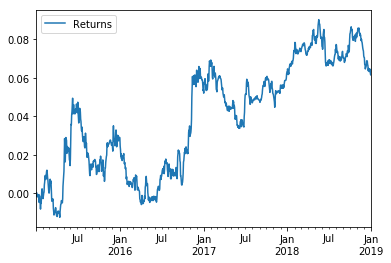

Returns    0.002177
dtype: float64

In [143]:
daily_ret.cumsum().plot()
plt.show()

daily_ret.std()

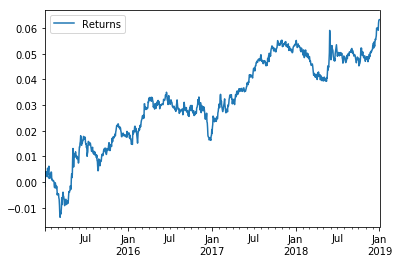

In [119]:
#daily_pl.sum()
daily_ret.cumsum().plot()
plt.show()

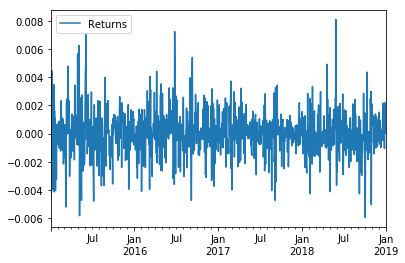

In [171]:
start_date = '1990-01-01'
end_date = '2015-01-01'
trade_date = '2015-01-02'
unwind_date = '2019-01-01'
trade_range = pd.date_range(trade_date, unwind_date, freq='B')
daily_pl = pd.DataFrame(index = trade_range.to_period("B"), columns = ["Daily P&L"])

equity_ret = equities.pct_change(WEEKDAYS_IN_YEAR)
bond_ret = BondReturnIdx.pct_change(WEEKDAYS_IN_YEAR)
one_day_returns = BondReturnIdx.pct_change(1)
daily_ret = pd.DataFrame(index = trade_range.to_period("B"), columns = ["Returns"])

#positions_track = pd.DataFrame(index = trade_range.to_period("B"), columns = equity_ret.columns)

for date in pd.date_range(trade_date, unwind_date, freq='B').date:
    training_eq = equity_ret.loc[start_date:end_date]
    training_bond = bond_ret.loc[start_date:end_date]
    equities_risk_adj = training_eq/training_eq.std()
    bond_risk_adj = training_bond/training_bond.std()
    outperformance = equities_risk_adj - bond_risk_adj
    outperformance = outperformance.rolling(20).mean()
    global_mean = outperformance.loc[end_date].mean()
    global_std = outperformance.loc[end_date].std()
    positions = (outperformance.loc[end_date] - global_mean)/global_std

    diffs = outperformance.diff().loc[end_date]
    pos_diffs = diffs.multiply(diffs.gt(0))
    if pos_diffs.sum() != 0:
        scaled_pos_diffs = pos_diffs / pos_diffs.sum()
    neg_diffs = diffs.multiply(diffs.lt(0))
    if neg_diffs.sum() != 0:
        scaled_neg_diffs = neg_diffs / neg_diffs.sum()
    weights = scaled_pos_diffs + scaled_neg_diffs
    positions = positions.multiply(weights)
#     print(weights)
    
#     diffs = outperformance.diff().abs().loc[end_date]
#     weights = diffs/diffs.sum()
#     positions = positions.multiply(weights)
#     print(weights)
    
    daily_ret.loc[date] = positions.dot(one_day_returns.loc[date]) / positions.abs().sum()
    
#     if daily_ret.loc[date].values < -.004:
#         print(positions)
#         print(outperformance.loc[end_date])
    
    end_date = date
daily_ret.plot()
plt.show()

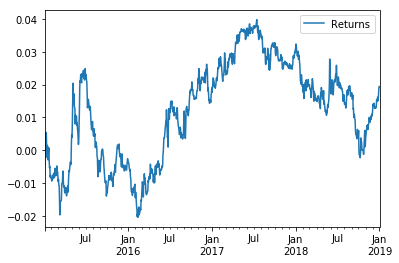

Returns    0.00164
dtype: float64

In [172]:
daily_ret.cumsum().plot()
plt.show()

daily_ret.std()

In [176]:
start_date = '1990-01-01'
end_date = '2015-01-01'
trade_date = '2015-01-02'
unwind_date = '2019-01-01'
trade_range = pd.date_range(trade_date, unwind_date, freq='B')
daily_pl = pd.DataFrame(index = trade_range.to_period("B"), columns = ["Daily P&L"])

equity_ret = equities.pct_change(WEEKDAYS_IN_YEAR)
bond_ret = BondReturnIdx.pct_change(WEEKDAYS_IN_YEAR)
one_day_returns = BondReturnIdx.pct_change(1)
daily_ret = pd.DataFrame(index = trade_range.to_period("B"), columns = ["Returns"])

#positions_track = pd.DataFrame(index = trade_range.to_period("B"), columns = equity_ret.columns)

for date in pd.date_range(trade_date, unwind_date, freq='B').date:
    training_eq = equity_ret.loc[start_date:end_date]
    training_bond = bond_ret.loc[start_date:end_date]
    equities_risk_adj = training_eq/training_eq.std()
    bond_risk_adj = training_bond/training_bond.std()
    outperformance = equities_risk_adj - bond_risk_adj
    outperformance = outperformance.rolling(20).mean()
    global_mean = outperformance.loc[end_date].mean()
    global_std = outperformance.loc[end_date].std()
    positions = (outperformance.loc[end_date] - global_mean)/global_std
    
    diffs = outperformance.diff().abs().loc[end_date]
    weights = diffs/diffs.sum()
    positions = positions.multiply(weights)
    print(positions)
    daily_ret.loc[date] = positions.dot(one_day_returns.loc[date]) / positions.abs().sum()
    
#     if daily_ret.loc[date].values < -.004:
#         print(positions)
#         print(outperformance.loc[end_date])
    
    end_date = date
daily_ret.plot()
plt.show()

country
AUS   -0.006179
CAN    0.037414
CHE    0.054132
DEU   -0.136288
ESP   -0.069094
FRA   -0.180283
GBR   -0.070985
ITA   -0.033463
JPN    0.209407
USA    0.133433
Name: 2015-01-01, dtype: float64
country
AUS   -0.004111
CAN    0.037139
CHE    0.058545
DEU   -0.147486
ESP   -0.052488
FRA   -0.186092
GBR   -0.079307
ITA   -0.034221
JPN    0.205910
USA    0.136779
Name: 2015-01-02, dtype: float64
country
AUS   -0.005586
CAN    0.030981
CHE    0.071721
DEU   -0.132724
ESP   -0.053413
FRA   -0.168593
GBR   -0.081435
ITA   -0.043643
JPN    0.188442
USA    0.130517
Name: 2015-01-05, dtype: float64
country
AUS   -0.006843
CAN    0.039529
CHE    0.063025
DEU   -0.122988
ESP   -0.047189
FRA   -0.163691
GBR   -0.068509
ITA   -0.041008
JPN    0.198847
USA    0.155466
Name: 2015-01-06, dtype: float64
country
AUS   -0.004978
CAN    0.030219
CHE    0.081699
DEU   -0.137408
ESP   -0.057395
FRA   -0.168653
GBR   -0.078939
ITA   -0.042827
JPN    0.158484
USA    0.135060
Name: 2015-01-07, dtype: flo

country
AUS    0.001306
CAN   -0.002314
CHE   -0.025089
DEU   -0.047150
ESP   -0.120547
FRA   -0.019948
GBR   -0.030625
ITA   -0.083675
JPN    0.223107
USA    0.211894
Name: 2015-03-04, dtype: float64
country
AUS    0.001787
CAN   -0.000554
CHE   -0.023541
DEU   -0.042281
ESP   -0.087289
FRA   -0.032930
GBR   -0.030324
ITA   -0.061904
JPN    0.405638
USA    0.088982
Name: 2015-03-05, dtype: float64
country
AUS   -0.001221
CAN   -0.001610
CHE   -0.006413
DEU   -0.133804
ESP   -0.022765
FRA   -0.101933
GBR   -0.040052
ITA   -0.044695
JPN    0.358212
USA    0.075561
Name: 2015-03-06, dtype: float64
country
AUS   -0.003966
CAN   -0.005876
CHE   -0.014505
DEU   -0.112388
ESP   -0.042264
FRA   -0.074159
GBR   -0.036847
ITA   -0.057921
JPN    0.370242
USA    0.009929
Name: 2015-03-09, dtype: float64
country
AUS   -0.003702
CAN   -0.014543
CHE   -0.011331
DEU   -0.078514
ESP   -0.033354
FRA   -0.081240
GBR   -0.010906
ITA   -0.024011
JPN    0.480412
USA    0.192121
Name: 2015-03-10, dtype: flo

country
AUS   -0.036095
CAN   -0.030748
CHE   -0.008464
DEU   -0.053726
ESP   -0.048882
FRA   -0.153405
GBR   -0.009829
ITA   -0.080920
JPN    0.079632
USA    0.052112
Name: 2015-05-08, dtype: float64
country
AUS   -0.038564
CAN   -0.037415
CHE   -0.006066
DEU   -0.049157
ESP   -0.045199
FRA   -0.143741
GBR   -0.005920
ITA   -0.090548
JPN    0.014332
USA    0.072278
Name: 2015-05-11, dtype: float64
country
AUS   -0.062879
CAN   -0.026902
CHE   -0.007539
DEU   -0.051730
ESP   -0.035122
FRA   -0.144586
GBR   -0.009609
ITA   -0.083977
JPN    0.100709
USA    0.049288
Name: 2015-05-12, dtype: float64
country
AUS   -0.062805
CAN   -0.026940
CHE   -0.009415
DEU   -0.047799
ESP   -0.034615
FRA   -0.143650
GBR   -0.002279
ITA   -0.081285
JPN    0.045869
USA    0.081417
Name: 2015-05-13, dtype: float64
country
AUS   -0.043027
CAN   -0.025290
CHE   -0.012471
DEU   -0.060004
ESP   -0.029676
FRA   -0.144351
GBR   -0.012531
ITA   -0.072763
JPN    0.054982
USA    0.086499
Name: 2015-05-14, dtype: flo

country
AUS   -0.027838
CAN   -0.048142
CHE   -0.067063
DEU    0.041007
ESP   -0.000917
FRA    0.071852
GBR   -0.155995
ITA    0.001742
JPN    0.115878
USA    0.028212
Name: 2015-07-13, dtype: float64
country
AUS   -0.047013
CAN   -0.057968
CHE   -0.058909
DEU    0.044676
ESP   -0.002145
FRA    0.075588
GBR   -0.169310
ITA    0.001855
JPN    0.085155
USA    0.017840
Name: 2015-07-14, dtype: float64
country
AUS   -0.039568
CAN   -0.056725
CHE   -0.053857
DEU    0.046656
ESP   -0.004257
FRA    0.094130
GBR   -0.128807
ITA    0.004680
JPN    0.051182
USA    0.016523
Name: 2015-07-15, dtype: float64
country
AUS   -0.064156
CAN   -0.102176
CHE   -0.049365
DEU    0.044118
ESP   -0.008466
FRA    0.094254
GBR   -0.083703
ITA    0.004319
JPN    0.087805
USA    0.007993
Name: 2015-07-16, dtype: float64
country
AUS   -0.048236
CAN   -0.028137
CHE   -0.043980
DEU    0.050434
ESP   -0.008527
FRA    0.093622
GBR   -0.122156
ITA    0.003769
JPN    0.119790
USA    0.046912
Name: 2015-07-17, dtype: flo

country
AUS   -0.094026
CAN   -0.127208
CHE   -0.017601
DEU    0.065335
ESP    0.023001
FRA    0.115209
GBR   -0.137242
ITA    0.038807
JPN    0.223997
USA    0.018138
Name: 2015-09-14, dtype: float64
country
AUS   -0.123716
CAN   -0.098713
CHE   -0.011780
DEU    0.050118
ESP    0.027576
FRA    0.104993
GBR   -0.139458
ITA    0.040839
JPN    0.302821
USA    0.015401
Name: 2015-09-15, dtype: float64
country
AUS   -0.102145
CAN   -0.016608
CHE   -0.007617
DEU    0.030099
ESP    0.033537
FRA    0.117542
GBR   -0.106542
ITA    0.053366
JPN    0.436568
USA    0.015901
Name: 2015-09-16, dtype: float64
country
AUS   -0.094473
CAN   -0.122685
CHE   -0.001232
DEU    0.017594
ESP    0.033275
FRA    0.097000
GBR   -0.062808
ITA    0.045376
JPN    0.484010
USA    0.017645
Name: 2015-09-17, dtype: float64
country
AUS   -0.102756
CAN   -0.037230
CHE   -0.001218
DEU    0.046405
ESP    0.043198
FRA    0.139835
GBR   -0.100721
ITA    0.065028
JPN    0.334448
USA    0.013822
Name: 2015-09-18, dtype: flo

country
AUS   -0.066484
CAN   -0.046131
CHE   -0.068050
DEU    0.027465
ESP   -0.000822
FRA    0.041872
GBR   -0.098457
ITA    0.020817
JPN    0.621246
USA    0.022238
Name: 2015-11-18, dtype: float64
country
AUS   -0.131830
CAN   -0.244143
CHE   -0.055499
DEU    0.016990
ESP   -0.002324
FRA    0.030138
GBR   -0.078968
ITA    0.012995
JPN    0.347067
USA    0.048651
Name: 2015-11-19, dtype: float64
country
AUS   -0.193975
CAN   -0.217985
CHE   -0.063491
DEU    0.000393
ESP   -0.001398
FRA    0.025269
GBR   -0.093958
ITA    0.004234
JPN    0.377366
USA    0.028750
Name: 2015-11-20, dtype: float64
country
AUS   -0.311666
CAN   -0.107084
CHE   -0.087486
DEU    0.029187
ESP   -0.000171
FRA    0.015323
GBR   -0.093408
ITA    0.006239
JPN    0.390941
USA    0.013844
Name: 2015-11-23, dtype: float64
country
AUS   -0.272108
CAN   -0.017324
CHE   -0.095454
DEU    0.112121
ESP   -0.000247
FRA    0.099296
GBR   -0.084244
ITA    0.000087
JPN    0.348641
USA    0.014223
Name: 2015-11-24, dtype: flo

country
AUS   -0.032660
CAN   -0.053193
CHE   -0.055130
DEU    0.114526
ESP   -0.008378
FRA    0.156174
GBR   -0.069230
ITA    0.074318
JPN    0.052074
USA    0.014745
Name: 2016-01-25, dtype: float64
country
AUS   -0.022084
CAN   -0.021798
CHE   -0.016000
DEU    0.146564
ESP   -0.010220
FRA    0.206610
GBR   -0.075663
ITA    0.069314
JPN    0.057891
USA    0.030912
Name: 2016-01-26, dtype: float64
country
AUS   -0.070111
CAN   -0.045634
CHE   -0.001911
DEU    0.122080
ESP   -0.011259
FRA    0.186330
GBR   -0.073659
ITA    0.074728
JPN    0.070576
USA    0.028381
Name: 2016-01-27, dtype: float64
country
AUS   -0.077339
CAN   -0.148957
CHE    0.003068
DEU    0.123208
ESP   -0.010846
FRA    0.174084
GBR   -0.077792
ITA    0.081582
JPN    0.074969
USA    0.009176
Name: 2016-01-28, dtype: float64
country
AUS   -0.071550
CAN   -0.161959
CHE    0.007609
DEU    0.119497
ESP   -0.012382
FRA    0.182498
GBR   -0.064839
ITA    0.074856
JPN    0.079138
USA    0.013238
Name: 2016-01-29, dtype: flo

country
AUS   -0.106244
CAN    0.001254
CHE    0.002740
DEU   -0.004618
ESP    0.004077
FRA    0.001274
GBR   -0.226326
ITA    0.013830
JPN   -0.049490
USA    0.315609
Name: 2016-03-28, dtype: float64
country
AUS   -0.117436
CAN    0.001757
CHE    0.000022
DEU   -0.001737
ESP    0.039684
FRA    0.082316
GBR   -0.163166
ITA    0.039146
JPN   -0.069201
USA    0.301067
Name: 2016-03-29, dtype: float64
country
AUS   -0.046193
CAN    0.005205
CHE   -0.000233
DEU   -0.002227
ESP    0.068446
FRA    0.029470
GBR   -0.244508
ITA    0.027075
JPN   -0.091039
USA    0.358625
Name: 2016-03-30, dtype: float64
country
AUS   -0.033903
CAN    0.015995
CHE   -0.000339
DEU   -0.002975
ESP    0.054048
FRA    0.021545
GBR   -0.219871
ITA    0.025336
JPN   -0.063522
USA    0.341760
Name: 2016-03-31, dtype: float64
country
AUS   -0.022008
CAN    0.022354
CHE   -0.001456
DEU   -0.000346
ESP    0.088564
FRA    0.084901
GBR   -0.116081
ITA    0.027900
JPN   -0.166135
USA    0.284102
Name: 2016-04-01, dtype: flo

KeyboardInterrupt: 

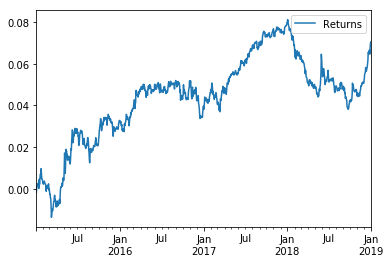

In [175]:
daily_ret.cumsum().plot()
plt.show()

In [166]:
daily_ret.std()

Returns    0.001496
dtype: float64

In [167]:
0.001496/0.001204

1.2425249169435215

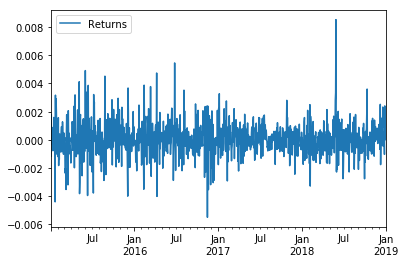

In [197]:
start_date = '1990-01-01'
end_date = '2015-01-01'
trade_date = '2015-01-02'
unwind_date = '2019-01-01'
trade_range = pd.date_range(trade_date, unwind_date, freq='B')
daily_pl = pd.DataFrame(index = trade_range.to_period("B"), columns = ["Daily P&L"])

equity_ret = equities.pct_change(WEEKDAYS_IN_YEAR)
bond_ret = BondReturnIdx.pct_change(WEEKDAYS_IN_YEAR)
one_day_returns = BondReturnIdx.pct_change(1)
daily_ret = pd.DataFrame(index = trade_range.to_period("B"), columns = ["Returns"])

#positions_track = pd.DataFrame(index = trade_range.to_period("B"), columns = equity_ret.columns)

for date in pd.date_range(trade_date, unwind_date, freq='B').date:
    training_eq = equity_ret.loc[start_date:end_date]
    training_bond = bond_ret.loc[start_date:end_date]
    equities_risk_adj = training_eq/training_eq.std()
    bond_risk_adj = training_bond/training_bond.std()
    outperformance = equities_risk_adj - bond_risk_adj
    outperformance = outperformance.rolling(20).mean()
    diffs = outperformance.diff().abs().loc[end_date]
    weights = diffs/diffs.sum()
    outperformance = outperformance.loc[end_date].multiply(weights)
    positions = (outperformance - outperformance.mean()) / outperformance.std()
#     global_mean = outperformance.loc[end_date].mean()
#     global_std = outperformance.loc[end_date].std()
#     positions = (outperformance.loc[end_date] - global_mean)/global_std
    
   
    #positions = positions.multiply(weights)
   # print(positions)
    daily_ret.loc[date] = positions.dot(one_day_returns.loc[date]) / positions.abs().sum()
    
#     if daily_ret.loc[date].values < -.004:
#         print(positions)
#         print(outperformance.loc[end_date])
    
    end_date = date
daily_ret.plot()
plt.show()

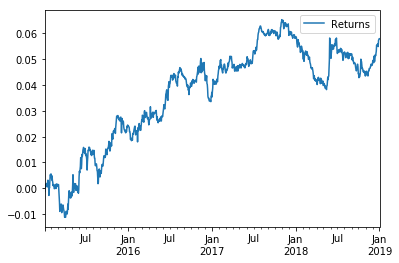

In [198]:
daily_ret.cumsum().plot()
plt.show()

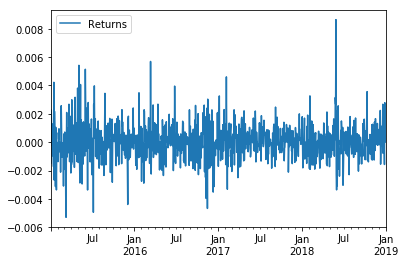

In [180]:
start_date = '1990-01-01'
end_date = '2015-01-01'
trade_date = '2015-01-02'
unwind_date = '2019-01-01'
trade_range = pd.date_range(trade_date, unwind_date, freq='B')
daily_pl = pd.DataFrame(index = trade_range.to_period("B"), columns = ["Daily P&L"])

equity_ret = equities.pct_change(WEEKDAYS_IN_YEAR)
bond_ret = BondReturnIdx.pct_change(WEEKDAYS_IN_YEAR)
one_day_returns = BondReturnIdx.pct_change(1)
daily_ret = pd.DataFrame(index = trade_range.to_period("B"), columns = ["Returns"])

#positions_track = pd.DataFrame(index = trade_range.to_period("B"), columns = equity_ret.columns)

for date in pd.date_range(trade_date, unwind_date, freq='B').date:
    training_eq = equity_ret.loc[start_date:end_date]
    training_bond = bond_ret.loc[start_date:end_date]
    equities_risk_adj = training_eq/training_eq.std()
    bond_risk_adj = training_bond/training_bond.std()
    outperformance = equities_risk_adj - bond_risk_adj
    outperformance = outperformance.rolling(20).mean()
    global_mean = outperformance.loc[end_date].mean()
    global_std = outperformance.loc[end_date].std()
    positions = (outperformance.loc[end_date] - global_mean)/global_std
    
    diffs = outperformance.diff().abs().loc[end_date]
    weights = diffs/diffs.sum()
    positions = positions.multiply(weights)
    
    positions = (positions - positions.mean()) / positions.std()
    daily_ret.loc[date] = positions.dot(one_day_returns.loc[date]) / positions.abs().sum()
    
#     if daily_ret.loc[date].values < -.004:
#         print(positions)
#         print(outperformance.loc[end_date])
    
    end_date = date
daily_ret.plot()
plt.show()

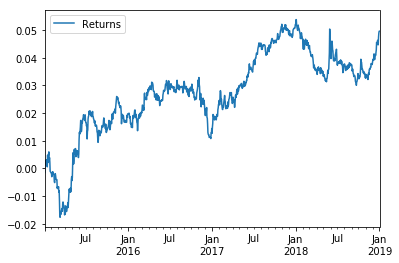

In [181]:
daily_ret.cumsum().plot()
plt.show()

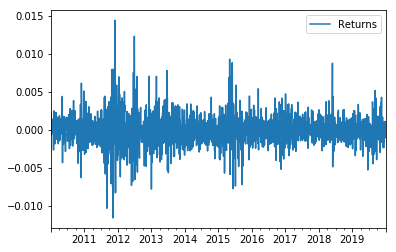

In [364]:
start_date = '1985-01-01'
end_date = '2010-01-01'
trade_date = '2010-01-02'
unwind_date = '2019-12-31'
trade_range = pd.date_range(trade_date, unwind_date, freq='B')
daily_pl = pd.DataFrame(index = trade_range.to_period("B"), columns = ["Daily P&L"])

equity_ret = equities.pct_change(WEEKDAYS_IN_YEAR)
bond_ret = BondReturnIdx.pct_change(WEEKDAYS_IN_YEAR)
one_day_returns = BondReturnIdx.pct_change(1)
daily_ret = pd.DataFrame(index = trade_range.to_period("B"), columns = ["Returns"])

#positions_track = pd.DataFrame(index = trade_range.to_period("B"), columns = equity_ret.columns)

for date in pd.date_range(trade_date, unwind_date, freq='B').date:
    training_eq = equity_ret.loc[start_date:end_date]
    training_bond = bond_ret.loc[start_date:end_date]
    equities_risk_adj = training_eq/training_eq.std()
    bond_risk_adj = training_bond/training_bond.std()
    outperformance = equities_risk_adj - bond_risk_adj
    outperformance = outperformance.rolling(20).mean()
    global_mean = outperformance.loc[end_date].mean()
    global_std = outperformance.loc[end_date].std()
    positions = (outperformance.loc[end_date] - global_mean)/global_std
    
    diffs = outperformance.diff().abs().loc[end_date]
    weights = diffs/diffs.sum()
    positions = positions.multiply(weights)
    min_val = positions.min()
    max_val = positions.max()
    positions = positions.apply(lambda x: (2 * (x - min_val) / (max_val - min_val)) - 1)
    daily_ret.loc[date] = positions.dot(one_day_returns.loc[date]) / positions.abs().sum()
    
#     if daily_ret.loc[date].values < -.004:
#         print(positions)
#         print(outperformance.loc[end_date])
    
    end_date = date
daily_ret.plot()
plt.show()

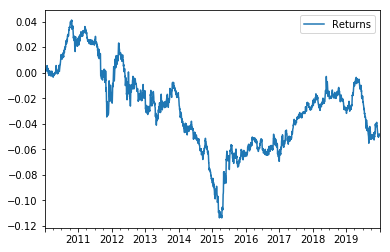

In [365]:
daily_ret.cumsum().plot()
plt.show()

In [194]:
daily_ret.std()

Returns    0.001577
dtype: float64

In [248]:
annual_ret_r = pd.DataFrame(index=pd.date_range('2015-01-01', '2019-01-01', freq='A'), columns=["Annual Return"])
annual_ret_r.fillna(0, inplace = True)
annual_ret_r

,Annual Return
2015-12-31,0
2016-12-31,0
2017-12-31,0
2018-12-31,0


In [249]:
for date in pd.date_range('2015-01-02', '2018-12-31', freq='B').date:
    annual_ret_r.loc[str(date.year) + '-12-31'] += daily_ret.loc[date].values[0]

In [242]:
annual_ret_r.loc['2015-12-31'] = daily_ret.loc['2015-10-10'].values[0]

In [250]:
annual_ret_r.head()

,Annual Return
2015-12-31,0.024296
2016-12-31,0.012797
2017-12-31,0.021399
2018-12-31,-0.000668


In [240]:
type(daily_ret.loc['2015-10-10'].values[0])

float

In [254]:
daily_ret.index

PeriodIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
             '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
             '2015-01-14', '2015-01-15',
             ...
             '2018-12-19', '2018-12-20', '2018-12-21', '2018-12-24',
             '2018-12-25', '2018-12-26', '2018-12-27', '2018-12-28',
             '2018-12-31', '2019-01-01'],
            dtype='period[B]', length=1043, freq='B')

In [260]:
ret = BondReturnIdx.mean(axis=1).pct_change(1).loc['2015-01-02':'2019-01-01']
ret = ret / ret.std()

In [261]:
ret.head()

date
2015-01-02    1.460925
2015-01-05    0.776503
2015-01-06    1.301888
2015-01-07   -1.142898
2015-01-08   -0.305743
Freq: B, dtype: float64

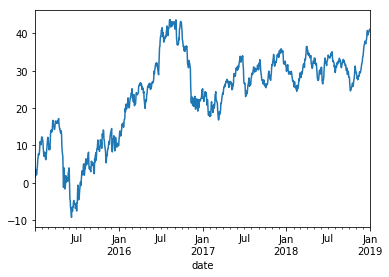

In [268]:
ret.cumsum().plot()

In [264]:
BondReturnIdx.mean(axis=1).pct_change(1).loc['2015-01-02':'2019-01-01'].std()

0.0025081193423294734

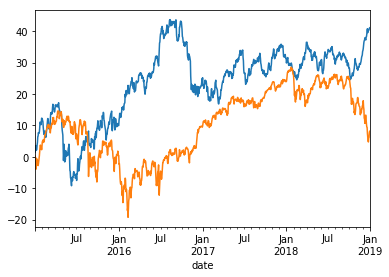

In [269]:
eq = equities.mean(axis=1).pct_change(1).loc['2015-01-02':'2019-01-01']
eq = eq / eq.std()
ret.cumsum().plot()
eq.cumsum().plot()
plt.show()

In [274]:
eq = equities.mean(axis=1).pct_change(1).loc['2015-01-02':'2019-01-01']
eq.std()

0.007443680501011153

In [275]:
equities.head()


country,AUS,CAN,FRA,DEU,ITA,JPN,ESP,CHE,USA,GBR
date,,,,,,,,,,
1980-01-01,98.636,207.125,113.572,85.022,54.065,248.954,51.871,93.331,104.383,142.826
1980-01-02,102.409,205.600,109.143,83.737,54.718,248.954,49.764,93.331,102.415,140.912
1980-01-03,104.112,204.073,108.879,82.466,56.568,248.949,49.800,93.193,101.840,139.613
1980-01-04,101.879,204.308,111.243,83.215,56.432,248.274,49.616,92.653,103.099,141.378
1980-01-07,103.832,206.335,111.976,83.418,57.265,247.976,49.616,91.925,103.389,142.064


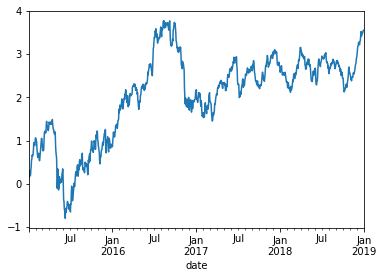

In [273]:
try_bond = BondReturnIdx.mean(axis=1).pct_change(1).loc['2015-01-02':'2019-01-01'].cumsum()
(try_bond / try_bond.std()).plot()
plt.show()

In [367]:
passive_bonds = BondReturnIdx.pct_change(1).dot(pd.Series(np.ones(10)*0.1).transpose()).loc['2010-01-02':'2019-12-31']
passive_bonds.std()

ValueError: matrices are not aligned

In [331]:
#passive.corr(daily_ret / daily_ret.std())
rets = (daily_ret / daily_ret.std())

In [343]:
pd.Series(np.ones(10)*0.1).transpose().shape

(10,)

In [341]:
BondReturnIdx.pct_change(1).shape

(10589, 10)

In [335]:
s = pd.Series(passive_bonds)

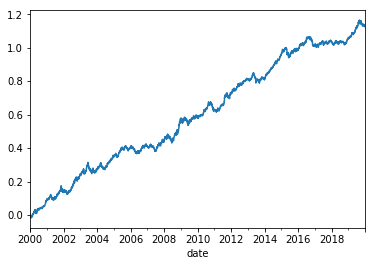

In [372]:
passive_bonds = (BondReturnIdx.pct_change(1) * np.ones(10)*0.1).sum(axis=1).loc['2000-01-02':'2019-12-31']
#corr = passive_bonds.astype('float64').corr(daily_ret["Returns"].astype('float64'))
passive_bonds.cumsum().plot()

In [371]:
passive_bonds.std()

0.0022937950508843804

In [350]:
0.1 * 0.000182 + -0.009984 * 0.1 + -0.009886 * 0.1

-0.0019688

In [369]:
passive_bonds = (BondReturnIdx.pct_change(1) * np.ones(10)*0.1).sum(axis=1).loc['2010-01-01':'2019-12-31']
passive_bonds.std()

0.002293355824929692

In [361]:
x = np.ones(10)*0.5
scaler_v = np.vectorize(lambda x: (2 * (x - 3) / (max_val - 10)) - 1)
scaler_v(x)

array([-0.48380551, -0.48380551, -0.48380551, -0.48380551, -0.48380551,
       -0.48380551, -0.48380551, -0.48380551, -0.48380551, -0.48380551])

In [379]:
arr = np.array([0,1,3])
(arr > 1) * (arr)

array([0, 0, 3])

In [380]:
passive_bonds.loc['2003-01-01']

date
1999-12-31   -0.000792
2000-01-03   -0.003376
2000-01-04   -0.005392
2000-01-05   -0.000759
2000-01-06   -0.001174
Freq: B, dtype: float64

In [427]:
#passive_bonds_2 = passive_bonds.to_frame()
#passive_bonds_2.Date = pd.to_datetime(passive_bonds_2.Date)
passive_bonds_2 = passive_bonds
#df.Date = pd.to_datetime(df.Date)
# passive_bonds_2.index = passive_bonds_2.to_timestamp()
# passive_bonds_2 = passive_bonds_2.groupby('date', axis=0).sum()
passive_bonds_2 = passive_bonds_2.groupby(passive_bonds_2.index.to_period('Q')).cumsum()
passive_bonds_2.head()

date
1999-12-31   -0.000792
2000-01-03   -0.003376
2000-01-04   -0.008767
2000-01-05   -0.009526
2000-01-06   -0.010700
Freq: B, dtype: float64

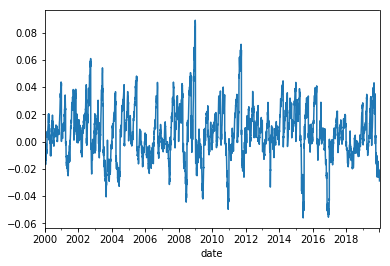

In [424]:
passive_bonds_2.plot()

In [425]:
passive_bonds_2['2003-01-01']

0.0002705163522626952

In [426]:
passive_bonds['2003-01-01']

0.0002705163522626952

In [407]:
passive_bonds.head()

date
1999-12-31   -0.000792
2000-01-03   -0.003376
2000-01-04   -0.005392
2000-01-05   -0.000759
2000-01-06   -0.001174
Freq: B, dtype: float64

date
2010-01-01    0.000115
2010-01-04   -0.000859
2010-01-05    0.001767
2010-01-06   -0.002073
2010-01-07    0.000550
Freq: B, dtype: float64

In [455]:
passive_bonds = (BondReturnIdx * np.ones(10)*0.1).pct_change(1).sum(axis=1).loc['2000-01-02':'2019-12-31']
passive_bonds.std()

0.02380124714654787

In [447]:
passive_bonds.astype('float64').corr(daily_ret["Returns"].astype('float64'))

-0.18622087628780348

In [449]:
BondReturnIdx.pct_change(1)

country,AUS,DEU,CAN,ESP,FRA,ITA,JPN,CHE,GBR,USA
date,,,,,,,,,,
1980-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-02,NaN,0.000182,NaN,NaN,NaN,NaN,NaN,NaN,-0.009984,-0.009886
1980-01-03,NaN,-0.003385,NaN,NaN,NaN,NaN,NaN,NaN,0.001120,-0.005786
1980-01-04,NaN,-0.000956,NaN,NaN,NaN,NaN,NaN,NaN,0.008182,-0.002220
1980-01-07,NaN,0.000183,NaN,NaN,NaN,NaN,NaN,NaN,0.005551,0.001818
1980-01-08,NaN,-0.001506,NaN,NaN,NaN,NaN,NaN,NaN,0.002931,0.003656
1980-01-09,NaN,-0.005443,NaN,NaN,NaN,NaN,NaN,NaN,-0.000911,0.000000
1980-01-10,NaN,-0.005678,NaN,NaN,NaN,NaN,NaN,NaN,0.012651,0.004209
1980-01-11,NaN,0.000165,NaN,NaN,NaN,NaN,NaN,NaN,0.005403,-0.009109
